In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import EarlyStopping


In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 15s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 10s 2us/step
Train set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


In [4]:
#Normalize
X_train=X_train/255.0
X_test=X_test/255.0

#One-Hot encode
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [5]:
# Build model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(10, activation='softmax')
])


C:\Users\AARUSHI TANDON\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
#compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Train
model.fit(X_train, y_train,
          epochs=20,               # Increase epochs, early stopping will stop it when needed
          batch_size=32,
          validation_split=0.2,
          callbacks=[early_stop])

# Evaluate
model.evaluate(X_test, y_test)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.7382 - loss: 0.7530 - val_accuracy: 0.8258 - val_loss: 0.4739
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8204 - loss: 0.4967 - val_accuracy: 0.8275 - val_loss: 0.4752
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8359 - loss: 0.4557 - val_accuracy: 0.8468 - val_loss: 0.4117
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.8428 - loss: 0.4354 - val_accuracy: 0.8504 - val_loss: 0.4079
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8475 - loss: 0.4225 - val_accuracy: 0.8677 - val_loss: 0.3640
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.8519 - loss: 0.4131 - val_accuracy: 0.8687 - val_loss: 0.3595
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.8547 - loss: 0.4053 - val_accuracy: 0.8640 - val_loss: 0.3684
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.8599 -

[0.38691407442092896, 0.8632000088691711]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


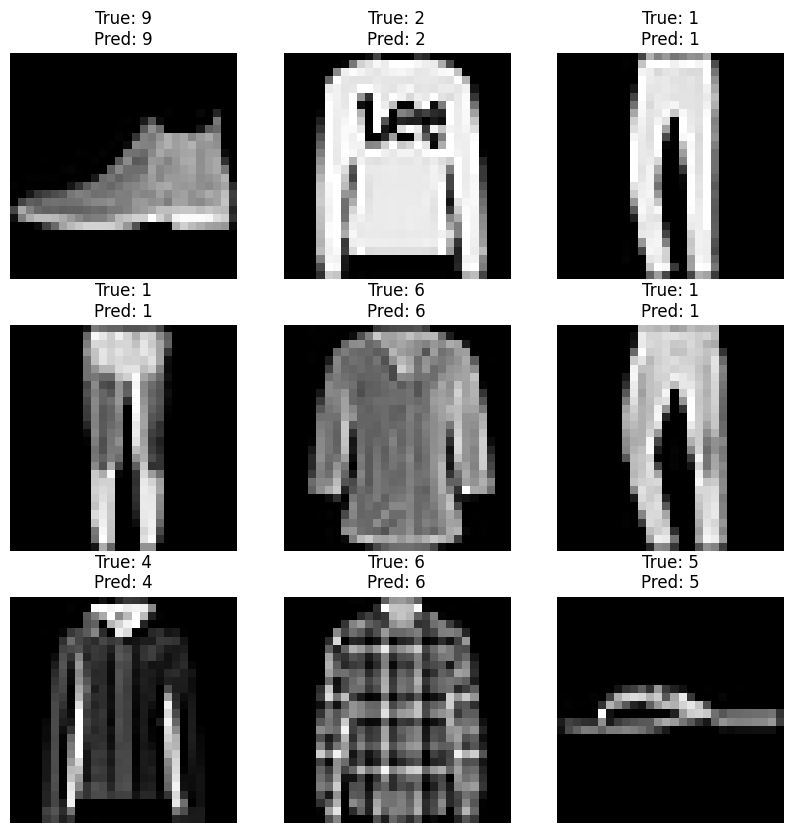

In [8]:
predictions = model.predict(X_test)
import numpy as np
import matplotlib.pyplot as plt
pred_probs=model.predict(X_test)
pred_labels=np.argmax(pred_probs, axis=1)
true_labels = np.argmax(y_test, axis=1)
plt.figure(figsize=(10,10))
for i in range(0,9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i], cmap="grey")
    plt.title(f"True: {true_labels[i]}\nPred: {pred_labels[i]}")
    plt.axis('off')
plt.show()




In [ ]:
# Train the model and store the history
history = model.fit(X_train, y_train, epochs=4, batch_size=32, validation_split=0.2)


Epoch 1/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.8821 - loss: 0.3153 - val_accuracy: 0.8802 - val_loss: 0.3381
Epoch 2/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8907 - loss: 0.3010 - val_accuracy: 0.8866 - val_loss: 0.3200
Epoch 3/4
1497/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8899 - loss: 0.2983

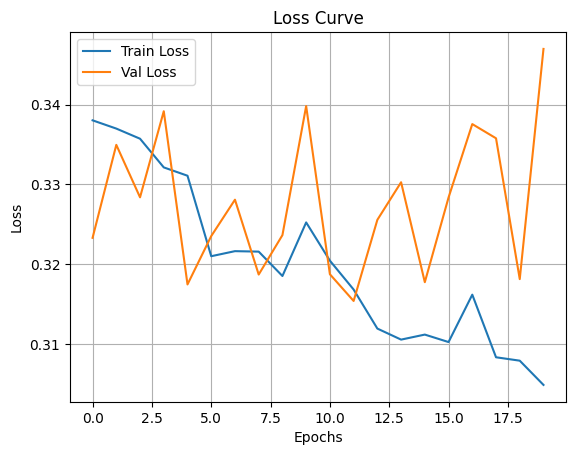

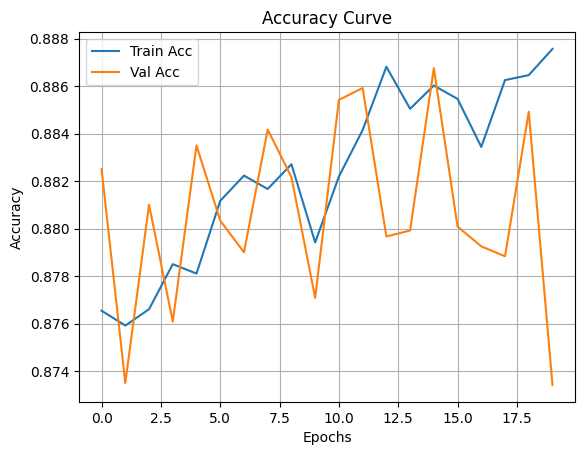

In [20]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.grid(True)
plt.show()


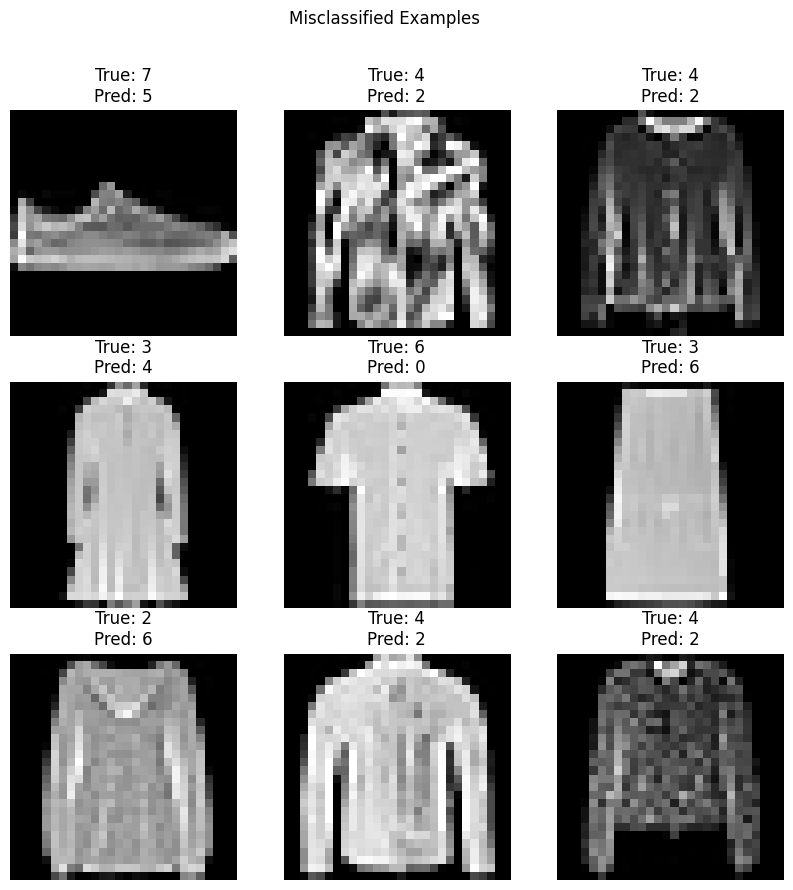

In [18]:
mis_idx = np.where( pred_labels!= true_labels)[0]
plt.figure(figsize=(10,10))
for i, idx in enumerate(mis_idx[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f"True: {true_labels[idx]}\nPred: {pred_labels[idx]}")
    plt.axis('off')
plt.suptitle("Misclassified Examples")
plt.show()
